In [38]:
from predict import predict
from helpers import draw_bboxs, resizer

In [39]:
import PIL
from PIL import Image

In [40]:
weights = 'best.pt'
image_path = 'thumb6567.jpg'
bboxs_image_save_path = 'thumb0236_bboxs.jpg'
size = 1280

In [41]:
image = Image.open(image_path)

In [42]:
pred_list, pred = predict(
    weights=weights,
    source=image_path,
    imgsz=[1344, 768]
)

In [43]:
image = draw_bboxs(image, pred_list)

In [44]:
image.save(bboxs_image_save_path, optimize=True, quality=100)

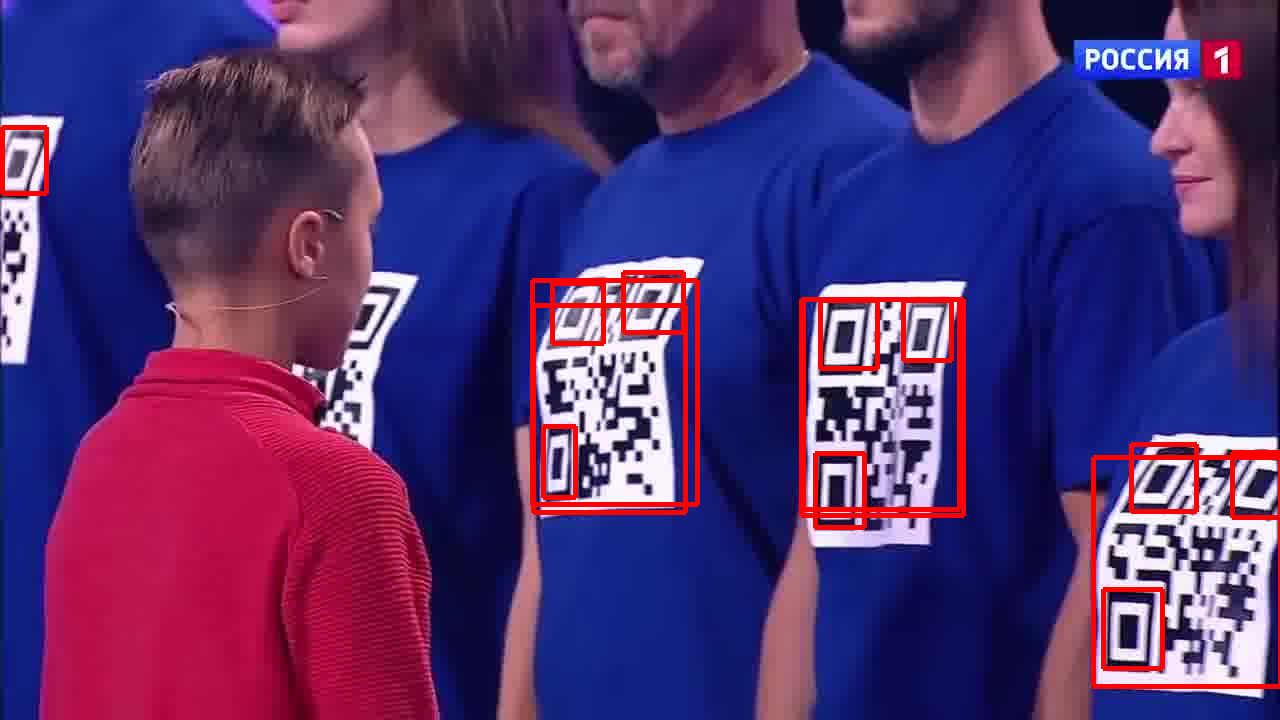

In [45]:
image

In [46]:
pred_list

[[1232, 452, 1280, 517],
 [533, 305, 685, 512],
 [803, 299, 959, 509],
 [543, 426, 575, 497],
 [552, 283, 603, 343],
 [1131, 444, 1196, 511],
 [623, 272, 683, 332],
 [801, 299, 963, 515],
 [532, 280, 697, 504],
 [2, 127, 46, 193],
 [815, 453, 864, 527],
 [903, 300, 951, 360],
 [1103, 589, 1162, 668],
 [820, 300, 877, 368],
 [1093, 457, 1280, 686]]

In [47]:
classes = np.array(pred[0])[:, -1]
for i in range(len(pred_list)):
    pred_list[i].append(classes[i])

In [48]:
pred_list

[[1232, 452, 1280, 517, 1.0],
 [533, 305, 685, 512, 0.0],
 [803, 299, 959, 509, 0.0],
 [543, 426, 575, 497, 0.0],
 [552, 283, 603, 343, 0.0],
 [1131, 444, 1196, 511, 0.0],
 [623, 272, 683, 332, 1.0],
 [801, 299, 963, 515, 1.0],
 [532, 280, 697, 504, 0.0],
 [2, 127, 46, 193, 0.0],
 [815, 453, 864, 527, 0.0],
 [903, 300, 951, 360, 0.0],
 [1103, 589, 1162, 668, 0.0],
 [820, 300, 877, 368, 0.0],
 [1093, 457, 1280, 686, 0.0]]

In [50]:
from predict import predict
from helpers import draw_bboxs, resizer

def get_quads(image, weights = "best.pt"):
    image_path = image
    
    pred_list, pred = predict(
    weights=weights,
    source=image_path,
    imgsz=[1344, 768])
    
    classes = np.array(pred[0])[:, -1]
    
    big_quads = []
    small_quads = []
    for i in range(len(pred_list)):
        pred_list[i].append(classes[i])
        if int(classes[i]) == 1:
            big_quads.append(pred_list[i])
        else:
            small_quads.append(pred_list[i])
            
    return big_quads, small_quads
        

big_quads, small_quads = get_quads('thumb6567.jpg')